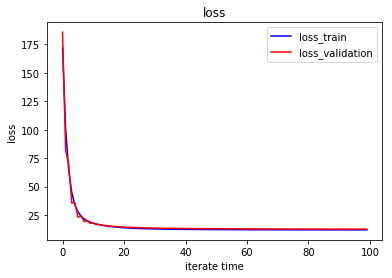

In [1]:
#实验名称：线性回归和梯度下降
#实验日期：2017/12/2
#实验目的：理解线性回归和梯度下降的原理

import os 
os.chdir('E://dataset')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#从数据集中读取数据，并使用train_test_split函数切分数据集，获得训练集和验证集
X, y = load_svmlight_file('housing_scale.txt')

X = X.toarray()
X = np.c_[X, np.ones((X.shape[0],1))]
y = y.reshape(y.shape[0], 1)

#使用train_test_split函数切分数据集，分为训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#对模型参数进行初始化，W为全0初始化,步长设为0.001,LAMBDA设为1,迭代次数设为100次
W = np.zeros((X.shape[1],1))
eta = 0.001
LAMBDA = 1
iterTime = 100

#使用list来记录每次迭代后的loss,loss_train_list记录训练集的loss，loss_validation记录验证集的loss
loss_train_list = []
loss_validation_list = []

#计算梯度的函数
def calGradient( LAMBDA, W, X_train, y_train):
    gradient = LAMBDA * W - np.dot(X_train.T, y_train).reshape(14, 1) + np.dot(np.dot(X_train.T, X_train), W)
    return gradient

#计算loss的函数
def calLoss(LAMBDA, W, X_t, y_t):
    X_tW = np.dot(X_t,W)   
    loss = LAMBDA * 1/2 * np.dot(W.T,W) + 1/2 * (np.dot((y_t - X_tW).T, (y_t - X_tW)))
    loss = loss /float(y_t.shape[0])
    return loss

#迭代过程，迭代次数为iterTime=100次
for i in range(iterTime):
    gradient = calGradient(LAMBDA, W, X_train, y_train)
    W = W - eta*gradient                               #每次迭代对W进行一次更新
    
    Ltrain = calLoss(LAMBDA, W, X_train, y_train)      #计算训练集的loss
    loss_train_list.append(Ltrain[0][0])               #将训练集的loss记录在loss_train_list中
    
    Lvalidation = calLoss(LAMBDA, W, X_test, y_test)   #计算验证集的loss
    loss_validation_list.append(Lvalidation[0][0])     #将验证集的loss记录在loss_validation_list中

#使用matplotlib来画出Ltrain和LValidation随迭代次数变化的图像
plt.xlabel('iterate time')
plt.ylabel('loss')
plt.title('loss')
x=range(len(loss_train_list))
plt.plot(x, loss_train_list,color='blue',label="loss_train")
x=range(len(loss_validation_list))
plt.plot(x, loss_validation_list,color='red',label=u'loss_validation')
plt.legend(loc='upper right')
plt.show()

